Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the data
df = pd.read_csv('data/Gas_Maintenance.xlsx - Sheet2(3).csv')
df.head()

,Date,Cost,Gal,Mile
0,6/16/17,10.37,4.052,83.4
1,6/19/17,15.29,7.426,194.7
2,7/14/17,21.21,10.567,274.8
3,7/24/17,24.53,12.269,254.1
4,8/18/17,19.42,9.081,163.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    97 non-null     object 
 1   Cost    97 non-null     float64
 2   Gal     97 non-null     float64
 3   Mile    97 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [4]:
#make price per gal column and mile per gal column
df['Price_per_Gallon'] = df['Cost'] / df['Gal']
df['Mile_per_Gallon'] = df['Mile'] / df['Gal']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              97 non-null     object 
 1   Cost              97 non-null     float64
 2   Gal               97 non-null     float64
 3   Mile              97 non-null     float64
 4   Price_per_Gallon  97 non-null     float64
 5   Mile_per_Gallon   97 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.7+ KB


In [5]:
df.head()

,Date,Cost,Gal,Mile,Price_per_Gallon,Mile_per_Gallon
0,6/16/17,10.37,4.052,83.4,2.559230,20.582428
1,6/19/17,15.29,7.426,194.7,2.058982,26.218691
2,7/14/17,21.21,10.567,274.8,2.007192,26.005489
3,7/24/17,24.53,12.269,254.1,1.999348,20.710734
4,8/18/17,19.42,9.081,163.3,2.138531,17.982601


In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y')

df.set_index('Date',inplace=True)

In [7]:
df.head()

,Cost,Gal,Mile,Price_per_Gallon,Mile_per_Gallon
Date,,,,,
2017-06-16,10.37,4.052,83.4,2.559230,20.582428
2017-06-19,15.29,7.426,194.7,2.058982,26.218691
2017-07-14,21.21,10.567,274.8,2.007192,26.005489
2017-07-24,24.53,12.269,254.1,1.999348,20.710734
2017-08-18,19.42,9.081,163.3,2.138531,17.982601


In [24]:
data = pd.Series(df['Price_per_Gallon'], index=df.index)

roll_mean = data.rolling(window=4).mean()

<AxesSubplot:xlabel='Date'>

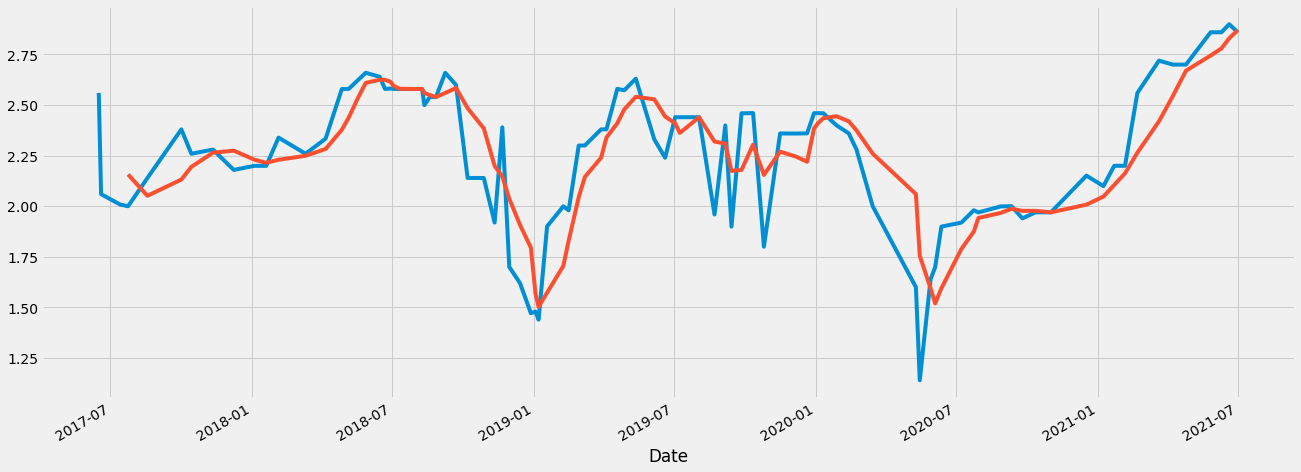

In [26]:
plt.style.use('fivethirtyeight')
df['Price_per_Gallon'].plot(figsize=(20,8))
roll_mean.plot()

In [31]:
exp_roll_mean = data.ewm(halflife=5).mean()

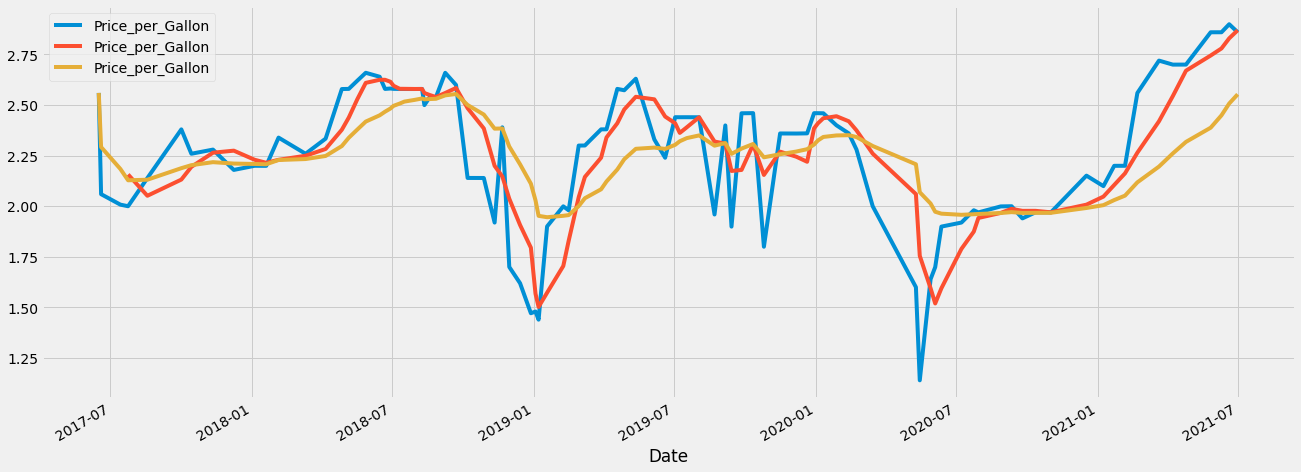

In [32]:
df['Price_per_Gallon'].plot(figsize=(20,8))
roll_mean.plot()
exp_roll_mean.plot()
plt.legend()